# 10. 워드 임베딩(Word Embedding)

## 05) 글로브(GloVe)

글로브(Global Vectors for Word Representation, GloVe)는 LSA의 메커니즘이었던 카운트 기반과 Word2Vec의 메커니즘이었던 예측 기반을 모두 사용하는 방법론.

### 2. 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)

<li>I like deep learning</li>

<li>I like NLP</li>

<li>I enjoy flying</li>

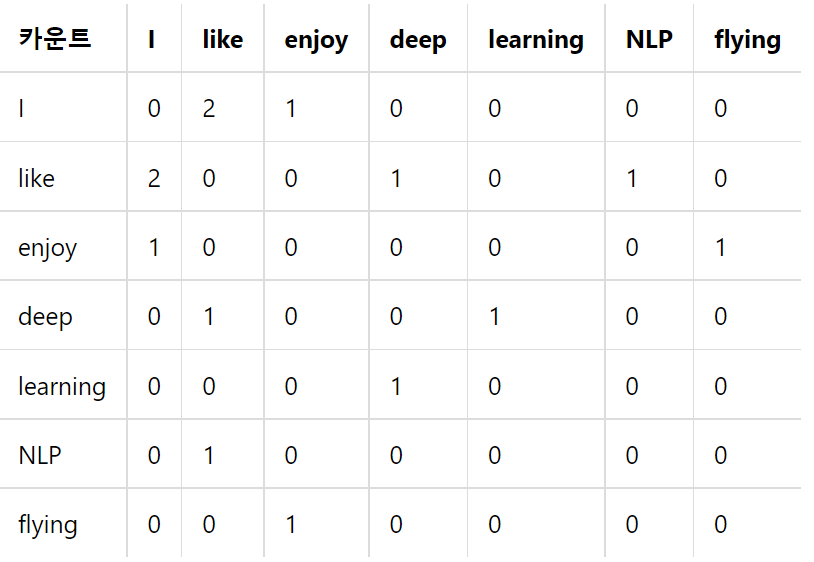

### 3. 동시 등장 확률(Co-occurrence Probability)

동시 등장 확률 P(k | i)는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률입니다.

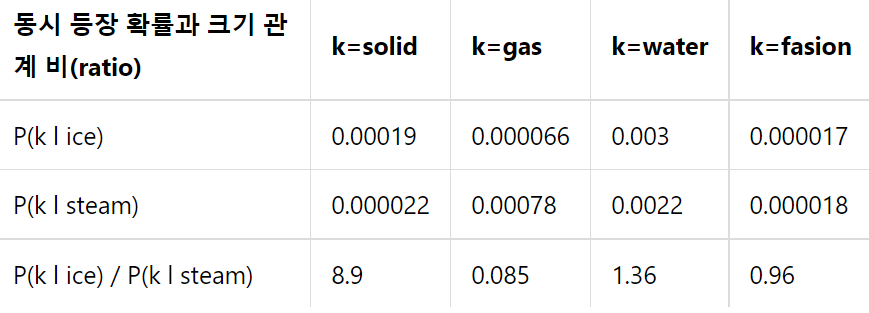

### 4. 손실 함수(Loss function)

GloVe의 아이디어를 한 줄로 요약하면 **'임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것'**입니다. 

### 5. GloVe 훈련시키기

In [2]:
pip install glove_python_binary

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [7]:
import re
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

targetXML = open('./datasets/ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [8]:
from glove import Corpus, Glove

corpus = Corpus()

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05)

# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [9]:
print(glove.most_similar("man"))

[('woman', 0.9577493274446884), ('guy', 0.8926751717126762), ('girl', 0.8569984793984456), ('young', 0.8370647544588822)]


In [10]:
print(glove.most_similar("boy"))

[('girl', 0.9391556905167564), ('woman', 0.8543404148532394), ('kid', 0.8365079185574079), ('man', 0.830040127094459)]


In [11]:
print(glove.most_similar("university"))

[('harvard', 0.8928645650380782), ('mit', 0.86286648939337), ('cambridge', 0.8540098258006178), ('stanford', 0.8465500645786662)]


In [12]:
print(glove.most_similar("water"))

[('air', 0.8373936988361902), ('clean', 0.8333043292434816), ('fresh', 0.8332171929987671), ('food', 0.8026159806285064)]


In [13]:
print(glove.most_similar("physics"))

[('chemistry', 0.9064454253355343), ('mathematics', 0.8868353609150939), ('economics', 0.8850380665858761), ('beauty', 0.8757772873559885)]


In [14]:
print(glove.most_similar("muscle"))

[('tissue', 0.8786189561960132), ('nerve', 0.8490161714953138), ('stem', 0.7900657794325531), ('skeletal', 0.7746234580731564)]


In [15]:
print(glove.most_similar("clean"))

[('fresh', 0.840222047107187), ('water', 0.8333043292434816), ('wind', 0.7875181024993574), ('heat', 0.7846537799749311)]
